# ChatGPT、GPTを使ったtitanic分析応用編

ここでは、LangChainというGPTのAPIを使うライブラリを活用して、titnaicの分析をChatGPT風にやってみます。
 
 LangChainに準備される、pandas のagentを試します。

 https://python.langchain.com/en/latest/modules/agents/toolkits/examples/pandas.html

In [ ]:
!pip install langchain
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from langchain.agents import create_pandas_dataframe_agent

In [ ]:
from langchain.llms import OpenAI
import pandas as pd

df = pd.read_csv('http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#OpenAIの場合
import os
os.environ["OPENAI_API_KEY"] = "ここにOpenAIの API keyを入れます" #有料です

In [ ]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0), df, verbose=True)

In [ ]:
agent.run("how many rows are there?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of rows
Action: python_repl_ast
Action Input: len(df)
Observation: 891
Thought: I now know the final answer
Final Answer: There are 891 rows in the dataframe.

> Finished chain.


'There are 891 rows in the dataframe.'

In [ ]:
agent.run("give me explanation for each column")



> Entering new AgentExecutor chain...
Thought: I should explain each column one by one
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Thought: I should explain each column one by one
Action: python_repl_ast
Action Input: df.info()<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null   

"PassengerId: Unique identifier for each passenger\nSurvived: Whether the passenger survived or not (1 = survived, 0 = did not survive)\nPclass: The passenger's class (1 = first class, 2 = second class, 3 = third class)\nName: The passenger's name\nSex: The passenger's gender\nAge: The passenger's age\nSibSp: The number of siblings/spouses the passenger had on board\nParch: The number of parents/children the passenger had on board\nTicket: The passenger's ticket number\nFare: The fare the passenger paid\nCabin: The cabin the passenger was in\nEmbarked: The port the passenger embarked from (C = Cherbourg, Q = Queenstown, S = Southampton)"

In [ ]:
agent.run("whats the square root of the average age?")



> Entering new AgentExecutor chain...
Thought: I need to calculate the average age first
Action: python_repl_ast
Action Input: df['Age'].mean()
Observation: 29.69911764705882
Thought: I can now calculate the square root
Action: python_repl_ast
Action Input: math.sqrt(df['Age'].mean())
Observation: name 'math' is not defined
Thought: I need to import the math library
Action: python_repl_ast
Action Input: import math
Observation: 
Thought: I can now calculate the square root
Action: python_repl_ast
Action Input: math.sqrt(df['Age'].mean())
Observation: 5.449689683556195
Thought: I now know the final answer
Final Answer: 5.449689683556195

> Finished chain.


'5.449689683556195'



> Entering new AgentExecutor chain...
Thought: I need to group the ages and then draw a pie chart
Action: python_repl_ast
Action Input: df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 15, 60, np.inf], labels=['<15', '15-60', '>=60'])
Observation: name 'pd' is not defined
Thought: I need to import pandas
Action: python_repl_ast
Action Input: import pandas as pd
Observation: 
Thought: Now I can group the ages
Action: python_repl_ast
Action Input: df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 15, 60, np.inf], labels=['<15', '15-60', '>=60'])
Observation: name 'np' is not defined
Thought: I need to import numpy
Action: python_repl_ast
Action Input: import numpy as np
Observation: 
Thought: Now I can group the ages
Action: python_repl_ast
Action Input: df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 15, 60, np.inf], labels=['<15', '15-60', '>=60'])
Observation: 
Thought: Now I can draw the pie chart
Action: python_repl_ast
Action Input: df['AgeGroup'].value_counts().plot.pie(autopct='%1.1f%%', lege

'The pie chart with legend for the three age groups (<15, 15-60, >=60) has been drawn.'

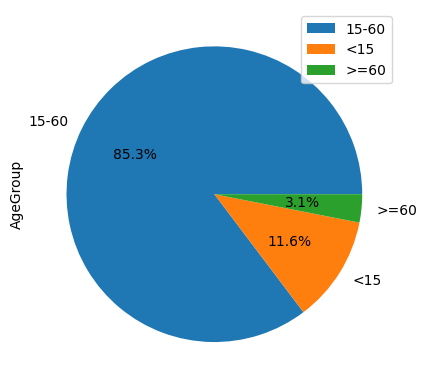

In [ ]:
agent.run("make three age groupes:  age <15, 15=<age<60<, age>=60. draw pie chart with legend for these age groupe")

In [ ]:
agent.run('what is the most survived group? what is the opposite?')



> Entering new AgentExecutor chain...
Thought: I need to find the group with the highest survival rate and the group with the lowest survival rate
Action: python_repl_ast
Action Input: df.groupby('Sex')['Survived'].mean()
Observation: Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Thought: I now know the most and least survived groups
Final Answer: The most survived group is female with a survival rate of 0.742038 and the least survived group is male with a survival rate of 0.188908.

> Finished chain.


'The most survived group is female with a survival rate of 0.742038 and the least survived group is male with a survival rate of 0.188908.'

In [ ]:
agent.run('what is the most survived group? what is the opposite? the group must be grouped using at least three attributes')

In [ ]:
agent.run("make cross summery table for PClass and suvived. show the table")

In [ ]:
agent.run("make cross summery table for PClass and suvived. draw bar chart with legend")

In [ ]:
agent.run("make cross summery table for PClass and suvived. draw piled bar chart with legend")

In [ ]:
agent.run("make summary table which tells for each PClass the dead(Survived=0), survived(Survived =1), and the suvival ratio. Show me the table")

In [ ]:
agent.run("make cross summery table for PClass and hierachy of sex and suvived. draw  bar chart with legend")

In [ ]:
agent.run("make cross summery table for PClass, sex,m and suvived. draw  3 dimensions  chart with legend")

In [ ]:
agent.run("do you have any logical explanation for that female passengers have more suvival rate than male?")